In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install hdbscan
!pip install gensim==4.1.2
!pip install umap-learn

     |████████████████████████████████| 5.2 MB 6.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330812 sha256=0f86f869997f77ab16d36eeabd49ef090eaf1caa217fcecea89b14d8ca26b3a0
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 34.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=a3f0af78283c7ec2a3e2e23d9a847b5138f4cd01f9c788202b1aea86a82434ef
  Stored in directory: /root/.cache

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/wuhan_sv_data.csv')

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
id_area={}
index=0
for i in set(df['orgid'].values.tolist()):
    id_area[i]=index
    index=index+1

In [ ]:
len(set(df['orgid'].values.tolist()))*4

75628

In [ ]:
# embeddings
import hdbscan
import umap.umap_ as umap

In [ ]:
umap_embeddings = umap.UMAP(n_neighbors=15,n_components=5,metric='cosine').fit_transform(embeddings)
# umap_embeddings=embeddings
cluster = hdbscan.HDBSCAN(min_cluster_size=5,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


#### Sentence bert

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 79 kB 3.0 MB/s 
     |████████████████████████████████| 3.5 MB 19.9 MB/s 
     |████████████████████████████████| 1.2 MB 24.6 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 6.8 MB 27.9 MB/s 
     |████████████████████████████████| 596 kB 26.3 MB/s 
     |████████████████████████████████| 895 kB 16.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=b1871f987bc9c7663b920d1a20e8aaf9eb886d6733e2d52c82f43593173eecda
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
df.columns

Index(['description', 'tags', 'lat_wgs', 'lon_wgs', 'pov_exp', 'heading',
       'orgid', 'nid', 'captions'],
      dtype='object')

In [ ]:
def get_des(sentence):
    tmps=[]
    for i in sentence.split(';'):
        # if 'UNK' not in i:
        tmps.append(i.replace('UNK','').strip())
    return max(tmps, key=len)
df['sentence']=df.apply(lambda x:get_des(x['captions']),axis=1)

In [ ]:
len(id_area)

18907

In [ ]:
orgids=np.load('/content/drive/MyDrive/orgids.npy').tolist()

In [ ]:
df.head(1)

,description,tags,lat_wgs,lon_wgs,pov_exp,heading,orgid,nid,captions
0,Ｓ１１３,GENERAL,30.46088,114.301952,2.0,153.0,10141003150306134427600,10141003150306134427600_back_142.jpg,a truck driving down a road under a bridge;a t...


In [ ]:
df[df['orgid']==orgids[0]]['captions'].values.tolist()

['a road with cars driving on it;a highway with a few cars driving down it;a highway with a few cars driving on it;a highway with a few cars on it;a road with cars driving on it and buildings in the background',
 'a group of cars that are sitting in the street;a group of cars driving under a bridge;a group of cars driving down a road under a bridge;a group of cars parked on the side of a road;a group of cars parked on the side of the road',
 'a street corner with a building in the background;a street corner with a building and trees;a street with a few cars parked on it;a street with a few cars parked on the side of it;a street corner with a few cars parked on the side',
 'a couple of cars driving under a bridge;a couple of cars are parked under a bridge;a couple of cars that are sitting in the street;a couple of cars that are parked in front of a building;a couple of cars are parked in front of a building']

In [ ]:
tmp_dic={}
for orgid in orgids:
  tmp=[]
  for i in df[df['orgid']==orgid]['captions'].values.tolist():
    tmp.append(i.split(';')[0])
  tmp_dic[orgid]=' ; '.join(tmp)

In [ ]:
dfp=df.drop_duplicates(subset='orgid',keep='last')
# set“category”data type
dfp['orgid'] = dfp['orgid'].astype('category')
# inplace = True
list_custom=orgids #list(set(df['orgid'].values.tolist()))
dfp['orgid'].cat.reorder_categories(list_custom, inplace=True)
# inplace = True
dfp.sort_values('orgid', inplace=True)
# dfp.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [ ]:
df['scene'] = df['orgid'].map(tmp_dic)
dfp['scene'] = dfp['orgid'].map(tmp_dic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dfp.head(1)

,description,tags,lat_wgs,lon_wgs,pov_exp,heading,orgid,nid,captions,scene
16447,Ｇ１０７,GENERAL,30.612083,114.164546,2.0,107.0,10141003150629162530900,10141003150629162530900_right_28.jpg,a couple of cars driving under a bridge;a coup...,a road with cars driving on it ; a group of ca...


In [ ]:
dfp['scene'].values.tolist()[0]

'a road with cars driving on it ; a group of cars that are sitting in the street ; a street corner with a building in the background ; a couple of cars driving under a bridge'

#### Deal with city total scene

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

scene_embeddings=[]
for i in dfp['scene'].values.tolist():
  scene_embeddings.append(sbert_model.encode(
      i
  ))
scene_embeddings=np.array(scene_embeddings)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
scene_embeddings.shape

(18907, 768)

In [ ]:
emb_dic={}
for index, orgid in enumerate(orgids):
  emb_dic[orgid]=scene_embeddings[index].tolist()

#### set scene sentence as label

In [ ]:
# dfp=df.drop_duplicates(subset='orgid',keep='last')

In [ ]:
dfp.shape

(18907, 11)

In [ ]:
pd.read_csv('/content/drive/MyDrive/wuhan_sv_data_0219.csv').head(1)

,description,tags,lat_wgs,lon_wgs,pov_exp,heading,orgid,nid,sentence
0,Ｓ１１３,GENERAL,30.46088,114.301952,2.0,153.0,10141003150306134427600,10141003150306134427600_back_142.jpg,a red car driving down a street next to a tall...


In [ ]:
np.save('/content/drive/MyDrive/orgids.npy', np.array(orgids))

In [ ]:
orgids=np.load('/content/drive/MyDrive/orgids.npy').tolist()

#### compute scene cluster

In [ ]:
np.save('/content/drive/MyDrive/scene_embeddings.npy', 
        scene_embeddings)

In [ ]:
# embeddings
import hdbscan
import umap.umap_ as umap
umap_embeddings = umap.UMAP(n_neighbors=15,n_components=5,metric='cosine').fit_transform(
   scene_embeddings)
# umap_embeddings=embeddings
for num in [110,120,130,140,150]:
  # umap_embeddings=embeddings
  cluster_bert = hdbscan.HDBSCAN(min_cluster_size=num,
                metric='euclidean',                      
                cluster_selection_method='eom',
                ).fit(umap_embeddings)
  print(len(set(cluster_bert.labels_.tolist())))

13
2
2
2
2


In [ ]:
# embeddings
import hdbscan
import umap.umap_ as umap
umap_embeddings = umap.UMAP(n_neighbors=15,n_components=5,metric='cosine').fit_transform(
   scene_embeddings)
# umap_embeddings=embeddings
for num in [60,70,80,90]:
  # umap_embeddings=embeddings
  cluster_bert = hdbscan.HDBSCAN(min_cluster_size=num,
                metric='euclidean',                      
                cluster_selection_method='eom',
                ).fit(umap_embeddings)
  print(len(set(cluster_bert.labels_.tolist())))

In [ ]:
cluster_bert = hdbscan.HDBSCAN(min_cluster_size=100,
                metric='euclidean',                      
                cluster_selection_method='eom',
                ).fit(umap_embeddings)
print(len(set(cluster_bert.labels_.tolist())))

13


In [ ]:
dfp['label']=cluster_bert.labels_

In [ ]:
dfp.columns

Index(['description', 'tags', 'lat_wgs', 'lon_wgs', 'pov_exp', 'heading',
       'orgid', 'nid', 'captions', 'scene', 'emb', 'label'],
      dtype='object')

In [ ]:
dfp[['description', 'tags', 'lat_wgs', 'lon_wgs', 'pov_exp', 'heading',
'orgid', 'nid', 'captions', 'scene', 'label']].to_csv('/content/drive/MyDrive/0223scene标签.csv',index=None)

In [ ]:
dfp.groupby('label').describe()
# C:\MapDownload\OutPut

lat_wgs                                  ... heading                      
        count       mean       std        min  ...     25%    50%     75%    max
label                                          ...                              
-1     1374.0  30.568348  0.051583  30.459854  ...  100.25  202.0  275.00  360.0
 0     2846.0  30.564542  0.063221  30.459236  ...   77.00  187.5  276.00  360.0
 1      357.0  30.572024  0.051959  30.465469  ...   87.00  201.0  278.00  360.0
 2     2375.0  30.570603  0.052129  30.461392  ...   90.00  199.0  274.00  360.0
 3      260.0  30.569123  0.050929  30.461065  ...  101.75  209.5  281.00  359.0
 4     1333.0  30.575293  0.052226  30.460303  ...   90.00  200.0  276.00  360.0
 5      604.0  30.575140  0.065040  30.460351  ...   76.25  180.5  270.25  358.0
 6     5129.0  30.563263  0.056325  30.459747  ...   87.00  195.0  276.00  360.0
 7      341.0  30.565390  0.054285  30.460388  ...   82.00  192.0  272.00  360.0
 8     1626.0  30.570253  0.054262  30.459840  ...   99.25  201.0  274.00  360.0
 9     1785.0  30.565562  0.056275  30.459791  ...   96.00  200.0  280.00  360.0
 10     236.0  30.572930  0.046927  30.461733  ...   86.00  210.5  279.75  360.0
 11     641.0  30.565909  0.050264  30.461827  ...   96.00  204.0  278.00  360.0

[13 rows x 32 columns]

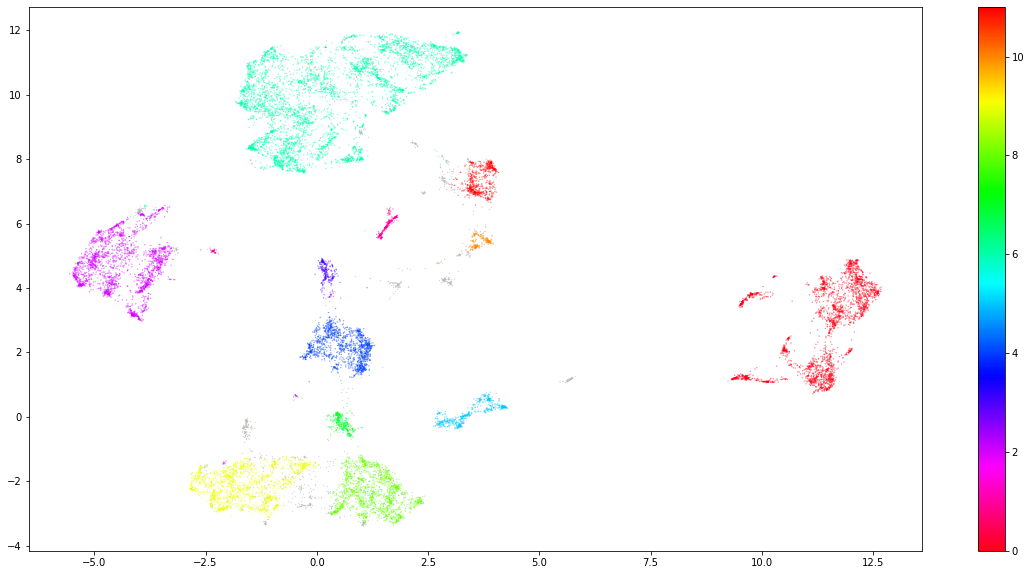

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0,
            metric='cosine').fit_transform(scene_embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_bert.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()